![NTNU logo](https://qore.no/res/ntnu-logo-100.png)


# The DL Classifier post processing and reporting tool

###### Author: Aya Saad
###### email: aya.saad@ntnu.no
###### Project: AILARON
###### Contact
###### email: annette.stahl@ntnu.no
###### funded by RCN IKTPLUSS program (project number 262741) and supported by NTNU AMOS
###### Copyright @NTNU 2020
---------------------------------------------------
<!-- -->

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import cmocean
from matplotlib import cm

from matplotlib.ticker import LinearLocator, FormatStrFormatter,PercentFormatter
%matplotlib inline
#%matplotlib notebook
import os
from datetime import datetime, timedelta
## map plots
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt

# importing library from the SINTEF processing 
# code available at https://github.com/SINTEF/PySilCam
import pysilcam.postprocess as scpp
import pysilcam.plotting as scplt
from pysilcam.config import PySilcamSettings

from scipy import stats as scipystats

# neptus logs library (from Andreas Våge repository)
from dune_proc import * #load_mission_list
from silcam_proc import *
from plotting_tool import *

In [35]:
#### Petridish
datapath = "D:/petridish/config.ini"
roidir = "D:/petridish/export"
extdir = "D:/petridish/ext"
SilCamDataPath = "D:/petridish/proc/"
SilCamDataFiles = ["RAW-STATS.csv"]
# location of unprocessed silc files
RAWDIR = "D:/petridish/RAW"
RAWBMP = "D:/petridish/RAWBMP"
OUTPUTDIR = "D:/petridish/proc"

In [36]:
threshold = 0.95
stat = load_silcam_data(SilCamDataFiles, SilCamDataPath)
#stat = stat.dropna()
stat = make_highest_prob(stat)
print('highest prob ', stat.shape)
stat = extract_middle(stat, [75,348, 1700, 2000])
print('stat.shape after extract middle',stat.shape)
print('stat.head', stat.head(3))
stat = stat[stat['highest prob'] >= threshold]
#stat = stat[stat['probability_copepod'] == stat['highest prob']]
#stat = stat[stat['probability_faecal_pellets'] >= threshold]
#stat = stat[stat['probability_diatom_chain'] == stat['highest prob']]
#stat = stat[stat['probability_other'] >= threshold]
stat_comb = stat_grouped(df=stat)
#stat_comb = stat_comb.set_index('timestamp',verify_integrity=True)

print(stat.shape)
print(stat_comb.shape)
print("######## stat_comb ##### ")
stat_comb[['file name', 'partind']] = stat_comb['export name'].str.split('-',expand=True) 
print(stat_comb.columns)
print(stat_comb.head(3))
#stat_comb = stat_comb[(stat_comb['depth']> 1)]
print('stat_comb.shape ',stat_comb.shape)
#silc_to_bmp(stat_comb['file name'].tolist(), RAWDIR, RAWBMP)
#stat_comb.to_csv(SilCamDataPath + '/stat_comb.csv', index = False, header=True)
print(stat_comb['file name'].tolist()[:2])

highest prob  (8487, 20)
stat.shape after extract middle (3792, 20)
stat.head                                   index  equivalent_diameter  \
timestamp                                                      
2019-11-25 12:54:07.768417+00:00      1             7.653040   
2019-11-25 12:54:07.768417+00:00      2             5.046265   
2019-11-25 12:54:07.768417+00:00      4             5.170883   

                                                  export name  \
timestamp                                                       
2019-11-25 12:54:07.768417+00:00  D20191125T125407.768417-PN1   
2019-11-25 12:54:07.768417+00:00  D20191125T125407.768417-PN2   
2019-11-25 12:54:07.768417+00:00  D20191125T125407.768417-PN4   

                                  major_axis_length    maxc   maxr    minc  \
timestamp                                                                    
2019-11-25 12:54:07.768417+00:00          10.539051  1997.0  244.0  1987.0   
2019-11-25 12:54:07.768417+00:00         

In [37]:
print(stat.shape)
stat = stat.dropna()
print(stat.shape)

df_extract = extract_to_roi(stat, stat_comb, roidir, 
                            extdir, 
                            msize=40, minimgsize=1000)
print(df_extract.shape)
if(df_extract.shape[0] > 0):
    objects_to_file(df_extract, roidir, extdir)
else:
    print('Extracted objects are too small!')

                                                                      

(1096, 20)
(1096, 20)
inside export_name2im D20191125T125407.768417-PN31
inside export_name2im D20191125T125408.678944-PN15
inside export_name2im D20191125T125410.525205-PN18
inside export_name2im D20191125T125411.869320-PN1


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125411.869320-PN1.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125413.455488-PN2
inside export_name2im D20191125T125415.039998-PN5
inside export_name2im D20191125T125416.400461-PN2
inside export_name2im D20191125T125432.891139-PN9
inside export_name2im D20191125T125434.018229-PN6
inside export_name2im D20191125T125434.889502-PN5
inside export_name2im D20191125T125453.637554-PN7
inside export_name2im D20191125T125454.289695-PN10
inside export_name2im D20191125T125455.906403-PN1
inside export_name2im D20191125T125617.536548-PN4
inside export_name2im D20191125T125618.680529-PN2
inside export_name2im D20191125T125619.850613-PN2
inside export_name2im D20191125T125620.539822-PN0
inside export_name2im D20191125T125621.870196-PN19
inside export_name2im D20191125T125622.763127-PN9
inside export_name2im D20191125T125624.129360-PN4
inside export_name2im D20191125T125625.281483-PN1
inside export_name2im D20191125T125634.153291-PN5
inside export_name2im D20191125T125634.801954-PN0
inside export_name2im D20191125T125635.450578-PN

C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125842.295962-PN20.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125846.037451-PN5
inside export_name2im D20191125T125846.459684-PN5
inside export_name2im D20191125T125851.615224-PN3
inside export_name2im D20191125T125855.362121-PN7
inside export_name2im D20191125T125858.403763-PN0
inside export_name2im D20191125T125910.273564-PN2
inside export_name2im D20191125T125910.706289-PN2
inside export_name2im D20191125T125911.604894-PN5
inside export_name2im D20191125T125912.041368-PN1
inside export_name2im D20191125T125912.707178-PN4
inside export_name2im D20191125T125913.165354-PN7
inside export_name2im D20191125T125913.611502-PN5
inside export_name2im D20191125T125915.700055-PN8
inside export_name2im D20191125T125916.811958-PN12
inside export_name2im D20191125T125917.933780-PN3
inside export_name2im D20191125T125919.085158-PN0
inside export_name2im D20191125T125921.203083-PN0
inside export_name2im D20191125T125921.651290-PN7


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125921.651290-PN7.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125923.009277-PN6
inside export_name2im D20191125T125923.887038-PN1
inside export_name2im D20191125T125925.248560-PN0
inside export_name2im D20191125T125927.111268-PN8
inside export_name2im D20191125T125927.756743-PN3
inside export_name2im D20191125T125930.277385-PN0
inside export_name2im D20191125T125941.949314-PN13
inside export_name2im D20191125T125943.794134-PN8
inside export_name2im D20191125T125944.929349-PN1
inside export_name2im D20191125T125946.283731-PN2
inside export_name2im D20191125T125949.055407-PN0
inside export_name2im D20191125T125951.177826-PN32
inside export_name2im D20191125T130002.911423-PN0
inside export_name2im D20191125T130010.634094-PN10
inside export_name2im D20191125T130011.292276-PN0
inside export_name2im D20191125T130011.944204-PN1
inside export_name2im D20191125T130012.367154-PN1
inside export_name2im D20191125T130012.788307-PN0
inside export_name2im D20191125T130013.196780-PN0
inside export_name2im D20191125T130013.848005-P

C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125407.768417-PN34.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125407.768417-PN36
inside export_name2im D20191125T125407.768417-PN41


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125407.768417-PN41.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125407.768417-PN59


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125407.768417-PN59.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125407.768417-PN61
inside export_name2im D20191125T125407.768417-PN76


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125407.768417-PN76.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125407.768417-PN85
inside export_name2im D20191125T125411.869320-PN1


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125411.869320-PN1.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125411.869320-PN12


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125411.869320-PN12.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125411.869320-PN13
inside export_name2im D20191125T125411.869320-PN21


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125411.869320-PN21.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125411.869320-PN32


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125411.869320-PN32.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125411.869320-PN35
inside export_name2im D20191125T125411.869320-PN37
inside export_name2im D20191125T125411.869320-PN38


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125411.869320-PN38.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125411.869320-PN47


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125411.869320-PN47.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125411.869320-PN52


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125411.869320-PN52.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125411.869320-PN59


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125411.869320-PN59.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125411.869320-PN80


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125411.869320-PN80.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125411.869320-PN85


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125411.869320-PN85.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125411.869320-PN88


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125411.869320-PN88.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.018229-PN6
inside export_name2im D20191125T125434.018229-PN8


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.018229-PN8.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.018229-PN9


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.018229-PN9.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.018229-PN12
inside export_name2im D20191125T125434.018229-PN13


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.018229-PN13.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.018229-PN19


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.018229-PN19.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.018229-PN30
inside export_name2im D20191125T125434.018229-PN31
inside export_name2im D20191125T125434.018229-PN32


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.018229-PN32.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.018229-PN43


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.018229-PN43.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.018229-PN47


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.018229-PN47.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.018229-PN48
inside export_name2im D20191125T125434.018229-PN58
inside export_name2im D20191125T125434.018229-PN76
inside export_name2im D20191125T125434.889502-PN5
inside export_name2im D20191125T125434.889502-PN13


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.889502-PN13.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.889502-PN14


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.889502-PN14.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.889502-PN17


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.889502-PN17.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.889502-PN19
inside export_name2im D20191125T125434.889502-PN27


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.889502-PN27.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.889502-PN28


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.889502-PN28.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.889502-PN30
inside export_name2im D20191125T125434.889502-PN31


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.889502-PN31.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.889502-PN32


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.889502-PN32.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.889502-PN35


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.889502-PN35.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.889502-PN37
inside export_name2im D20191125T125434.889502-PN43
inside export_name2im D20191125T125434.889502-PN46


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.889502-PN46.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.889502-PN48


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.889502-PN48.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.889502-PN49
inside export_name2im D20191125T125434.889502-PN57


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.889502-PN57.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.889502-PN70


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125434.889502-PN70.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125434.889502-PN80
inside export_name2im D20191125T125434.889502-PN87
inside export_name2im D20191125T125453.637554-PN7
inside export_name2im D20191125T125453.637554-PN9


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125453.637554-PN9.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125453.637554-PN32
inside export_name2im D20191125T125453.637554-PN33


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125453.637554-PN33.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125454.289695-PN10
inside export_name2im D20191125T125454.289695-PN28
inside export_name2im D20191125T125454.289695-PN29


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125454.289695-PN29.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125617.536548-PN4
inside export_name2im D20191125T125617.536548-PN19
inside export_name2im D20191125T125617.536548-PN25


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125617.536548-PN25.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125617.536548-PN29
inside export_name2im D20191125T125617.536548-PN45
inside export_name2im D20191125T125617.536548-PN49


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125617.536548-PN49.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125617.536548-PN51
inside export_name2im D20191125T125617.536548-PN57
inside export_name2im D20191125T125618.680529-PN2
inside export_name2im D20191125T125618.680529-PN6


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125618.680529-PN6.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125618.680529-PN34


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125618.680529-PN34.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125618.680529-PN35
inside export_name2im D20191125T125618.680529-PN51


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125618.680529-PN51.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125618.680529-PN61
inside export_name2im D20191125T125620.539822-PN0
inside export_name2im D20191125T125620.539822-PN8


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125620.539822-PN8.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125620.539822-PN19
inside export_name2im D20191125T125620.539822-PN24
inside export_name2im D20191125T125620.539822-PN29


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125620.539822-PN29.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125620.539822-PN32


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125620.539822-PN32.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125620.539822-PN37


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125620.539822-PN37.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125620.539822-PN42


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125620.539822-PN42.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125621.870196-PN19
inside export_name2im D20191125T125621.870196-PN22
inside export_name2im D20191125T125621.870196-PN23


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125621.870196-PN23.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125621.870196-PN24


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125621.870196-PN24.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125621.870196-PN25


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125621.870196-PN25.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125621.870196-PN27
inside export_name2im D20191125T125621.870196-PN28


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125621.870196-PN28.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125621.870196-PN31


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125621.870196-PN31.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125621.870196-PN33
inside export_name2im D20191125T125621.870196-PN34


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125621.870196-PN34.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125621.870196-PN36


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125621.870196-PN36.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125621.870196-PN37


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125621.870196-PN37.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125621.870196-PN38
inside export_name2im D20191125T125622.763127-PN9
inside export_name2im D20191125T125622.763127-PN12


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125622.763127-PN12.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125622.763127-PN13


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125622.763127-PN13.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125622.763127-PN16
inside export_name2im D20191125T125622.763127-PN18
inside export_name2im D20191125T125622.763127-PN19


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125622.763127-PN19.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125622.763127-PN21


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125622.763127-PN21.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125622.763127-PN23
inside export_name2im D20191125T125622.763127-PN24


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125622.763127-PN24.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125622.763127-PN27


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125622.763127-PN27.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125622.763127-PN28


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125622.763127-PN28.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125622.763127-PN30


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125622.763127-PN30.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125622.763127-PN31
inside export_name2im D20191125T125624.129360-PN4
inside export_name2im D20191125T125624.129360-PN8
inside export_name2im D20191125T125624.129360-PN12
inside export_name2im D20191125T125624.129360-PN20


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125624.129360-PN20.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125624.129360-PN21
inside export_name2im D20191125T125624.129360-PN24
inside export_name2im D20191125T125624.129360-PN26


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125624.129360-PN26.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125624.129360-PN33


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125624.129360-PN33.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125624.129360-PN38
inside export_name2im D20191125T125625.281483-PN1
inside export_name2im D20191125T125625.281483-PN17
inside export_name2im D20191125T125625.281483-PN22
inside export_name2im D20191125T125625.281483-PN35


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125625.281483-PN35.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125634.153291-PN5
inside export_name2im D20191125T125634.153291-PN12


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125634.153291-PN12.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125634.153291-PN13
inside export_name2im D20191125T125634.153291-PN29
inside export_name2im D20191125T125634.153291-PN30


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125634.153291-PN30.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125634.153291-PN32
inside export_name2im D20191125T125634.801954-PN0
inside export_name2im D20191125T125634.801954-PN5
inside export_name2im D20191125T125634.801954-PN6


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125634.801954-PN6.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125634.801954-PN7


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125634.801954-PN7.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125634.801954-PN8


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125634.801954-PN8.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125634.801954-PN16
inside export_name2im D20191125T125634.801954-PN21
inside export_name2im D20191125T125634.801954-PN31
inside export_name2im D20191125T125635.450578-PN0
inside export_name2im D20191125T125635.450578-PN5
inside export_name2im D20191125T125635.450578-PN8


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125635.450578-PN8.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125635.450578-PN13


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125635.450578-PN13.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125635.450578-PN14


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125635.450578-PN14.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125635.450578-PN26
inside export_name2im D20191125T125635.866842-PN2
inside export_name2im D20191125T125635.866842-PN5
inside export_name2im D20191125T125635.866842-PN14


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125635.866842-PN14.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125635.866842-PN18


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125635.866842-PN18.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125635.866842-PN21
inside export_name2im D20191125T125635.866842-PN33
inside export_name2im D20191125T125636.543516-PN1
inside export_name2im D20191125T125636.543516-PN4


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125636.543516-PN4.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125636.543516-PN5
inside export_name2im D20191125T125636.543516-PN11
inside export_name2im D20191125T125636.543516-PN12
inside export_name2im D20191125T125636.543516-PN14
inside export_name2im D20191125T125636.543516-PN18
inside export_name2im D20191125T125636.543516-PN24
inside export_name2im D20191125T125636.543516-PN25


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125636.543516-PN25.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125637.160521-PN6
inside export_name2im D20191125T125637.160521-PN7


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125637.160521-PN7.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125637.160521-PN8


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125637.160521-PN8.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125637.160521-PN10


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125637.160521-PN10.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125637.160521-PN11
inside export_name2im D20191125T125637.160521-PN12


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125637.160521-PN12.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125637.160521-PN14
inside export_name2im D20191125T125637.160521-PN17
inside export_name2im D20191125T125637.160521-PN19


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125637.160521-PN19.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125637.160521-PN20
inside export_name2im D20191125T125637.160521-PN21


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125637.160521-PN21.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125637.160521-PN27


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125637.160521-PN27.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125637.160521-PN30


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125637.160521-PN30.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125637.160521-PN31
inside export_name2im D20191125T125637.160521-PN33
inside export_name2im D20191125T125647.114662-PN16
inside export_name2im D20191125T125647.114662-PN19
inside export_name2im D20191125T125647.114662-PN20


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125647.114662-PN20.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125647.114662-PN23
inside export_name2im D20191125T125648.029328-PN6
inside export_name2im D20191125T125648.029328-PN14
inside export_name2im D20191125T125648.029328-PN16
inside export_name2im D20191125T125648.029328-PN19
inside export_name2im D20191125T125648.029328-PN20
inside export_name2im D20191125T125648.029328-PN21


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125648.029328-PN21.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125648.029328-PN22


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125648.029328-PN22.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125648.029328-PN23


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125648.029328-PN23.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125648.029328-PN24


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125648.029328-PN24.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125652.423412-PN20
inside export_name2im D20191125T125652.423412-PN22
inside export_name2im D20191125T125658.361445-PN2
inside export_name2im D20191125T125658.361445-PN4
inside export_name2im D20191125T125658.361445-PN12
inside export_name2im D20191125T125658.361445-PN15
inside export_name2im D20191125T125658.361445-PN23


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125658.361445-PN23.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125701.048633-PN2
inside export_name2im D20191125T125701.048633-PN12
inside export_name2im D20191125T125701.048633-PN14
inside export_name2im D20191125T125701.048633-PN17
inside export_name2im D20191125T125701.048633-PN33
inside export_name2im D20191125T125703.044645-PN10
inside export_name2im D20191125T125703.044645-PN11


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125703.044645-PN11.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125703.044645-PN12


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125703.044645-PN12.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125703.044645-PN16


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125703.044645-PN16.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125703.044645-PN18


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125703.044645-PN18.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125703.044645-PN19
inside export_name2im D20191125T125703.044645-PN21
inside export_name2im D20191125T125703.963334-PN0
inside export_name2im D20191125T125703.963334-PN16
inside export_name2im D20191125T125703.963334-PN17
inside export_name2im D20191125T125703.963334-PN20
inside export_name2im D20191125T125712.655994-PN5
inside export_name2im D20191125T125712.655994-PN7


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125712.655994-PN7.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125712.655994-PN9
inside export_name2im D20191125T125745.324058-PN3
inside export_name2im D20191125T125745.324058-PN9
inside export_name2im D20191125T125745.324058-PN14
inside export_name2im D20191125T125745.324058-PN21
inside export_name2im D20191125T125745.324058-PN25
inside export_name2im D20191125T125745.324058-PN30
inside export_name2im D20191125T125745.324058-PN31
inside export_name2im D20191125T125827.613452-PN6
inside export_name2im D20191125T125827.613452-PN42
inside export_name2im D20191125T125827.613452-PN63
inside export_name2im D20191125T125827.613452-PN68
inside export_name2im D20191125T125828.259182-PN6
inside export_name2im D20191125T125828.259182-PN66
inside export_name2im D20191125T125828.259182-PN76
inside export_name2im D20191125T125828.907082-PN5
inside export_name2im D20191125T125828.907082-PN35
inside export_name2im D20191125T125828.907082-PN45
inside export_name2im D20191125T125828.907082-PN60
inside export_name2im D20191125T12582

C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125829.790517-PN93.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125842.295962-PN20


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125842.295962-PN20.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125842.295962-PN25


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125842.295962-PN25.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125842.295962-PN30


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125842.295962-PN30.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125842.295962-PN31


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125842.295962-PN31.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125842.295962-PN41
inside export_name2im D20191125T125842.295962-PN43
inside export_name2im D20191125T125842.295962-PN51
inside export_name2im D20191125T125842.295962-PN61


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125842.295962-PN61.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125842.295962-PN66


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125842.295962-PN66.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125842.295962-PN70


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125842.295962-PN70.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125842.295962-PN98


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125842.295962-PN98.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125842.295962-PN118


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125842.295962-PN118.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125842.295962-PN130


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125842.295962-PN130.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125910.706289-PN2
inside export_name2im D20191125T125910.706289-PN4
inside export_name2im D20191125T125910.706289-PN35
inside export_name2im D20191125T125910.706289-PN38
inside export_name2im D20191125T125910.706289-PN47


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125910.706289-PN47.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125910.706289-PN84
inside export_name2im D20191125T125910.706289-PN92
inside export_name2im D20191125T125910.706289-PN98
inside export_name2im D20191125T125910.706289-PN171
inside export_name2im D20191125T125910.706289-PN180
inside export_name2im D20191125T125910.706289-PN190
inside export_name2im D20191125T125910.706289-PN199
inside export_name2im D20191125T125913.611502-PN5
inside export_name2im D20191125T125913.611502-PN12


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125913.611502-PN12.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125913.611502-PN17


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125913.611502-PN17.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125913.611502-PN22
inside export_name2im D20191125T125913.611502-PN30
inside export_name2im D20191125T125913.611502-PN33


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125913.611502-PN33.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125913.611502-PN36
inside export_name2im D20191125T125913.611502-PN60
inside export_name2im D20191125T125913.611502-PN61


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125913.611502-PN61.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125913.611502-PN62
inside export_name2im D20191125T125913.611502-PN64
inside export_name2im D20191125T125913.611502-PN65
inside export_name2im D20191125T125921.651290-PN7


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125921.651290-PN7.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125921.651290-PN14


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125921.651290-PN14.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125921.651290-PN26
inside export_name2im D20191125T125921.651290-PN27
inside export_name2im D20191125T125923.887038-PN1
inside export_name2im D20191125T125923.887038-PN12


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125923.887038-PN12.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125923.887038-PN14
inside export_name2im D20191125T125923.887038-PN21
inside export_name2im D20191125T125923.887038-PN35


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125923.887038-PN35.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125923.887038-PN47


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125923.887038-PN47.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125923.887038-PN57


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125923.887038-PN57.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125925.248560-PN0
inside export_name2im D20191125T125925.248560-PN4
inside export_name2im D20191125T125925.248560-PN5


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125925.248560-PN5.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125925.248560-PN8
inside export_name2im D20191125T125925.248560-PN13
inside export_name2im D20191125T125925.248560-PN17
inside export_name2im D20191125T125925.248560-PN21


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125925.248560-PN21.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125925.248560-PN23
inside export_name2im D20191125T125927.756743-PN3
inside export_name2im D20191125T125927.756743-PN4
inside export_name2im D20191125T125927.756743-PN9
inside export_name2im D20191125T125927.756743-PN12


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125927.756743-PN12.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125927.756743-PN13


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125927.756743-PN13.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125927.756743-PN20
inside export_name2im D20191125T125927.756743-PN21


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125927.756743-PN21.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125927.756743-PN22


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125927.756743-PN22.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125927.756743-PN35
inside export_name2im D20191125T125930.277385-PN0
inside export_name2im D20191125T125930.277385-PN8
inside export_name2im D20191125T125930.277385-PN10


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125930.277385-PN10.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125930.277385-PN13
inside export_name2im D20191125T125930.277385-PN24
inside export_name2im D20191125T125944.929349-PN1
inside export_name2im D20191125T125944.929349-PN6
inside export_name2im D20191125T125944.929349-PN12


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125944.929349-PN12.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125944.929349-PN13
inside export_name2im D20191125T125944.929349-PN14
inside export_name2im D20191125T125944.929349-PN16
inside export_name2im D20191125T125944.929349-PN19
inside export_name2im D20191125T125944.929349-PN24


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125944.929349-PN24.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125944.929349-PN25


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125944.929349-PN25.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125944.929349-PN27
inside export_name2im D20191125T125949.055407-PN0
inside export_name2im D20191125T125949.055407-PN4
inside export_name2im D20191125T125949.055407-PN12


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125949.055407-PN12.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125949.055407-PN14


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125949.055407-PN14.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125949.055407-PN16


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125949.055407-PN16.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125949.055407-PN18


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125949.055407-PN18.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T125949.055407-PN21
inside export_name2im D20191125T125949.055407-PN23


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T125949.055407-PN23.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130002.911423-PN0
inside export_name2im D20191125T130002.911423-PN1
inside export_name2im D20191125T130002.911423-PN2


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130002.911423-PN2.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130002.911423-PN3


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130002.911423-PN3.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130002.911423-PN5


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130002.911423-PN5.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130002.911423-PN8


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130002.911423-PN8.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130002.911423-PN10
inside export_name2im D20191125T130002.911423-PN12


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130002.911423-PN12.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130002.911423-PN14


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130002.911423-PN14.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130002.911423-PN23


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130002.911423-PN23.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130002.911423-PN35


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130002.911423-PN35.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130002.911423-PN39
inside export_name2im D20191125T130011.944204-PN1
inside export_name2im D20191125T130011.944204-PN2


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130011.944204-PN2.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130011.944204-PN3


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130011.944204-PN3.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130011.944204-PN15


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130011.944204-PN15.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130011.944204-PN18
inside export_name2im D20191125T130011.944204-PN19
inside export_name2im D20191125T130011.944204-PN21


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130011.944204-PN21.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130011.944204-PN22


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130011.944204-PN22.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130011.944204-PN23
inside export_name2im D20191125T130011.944204-PN26


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130011.944204-PN26.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130012.367154-PN1
inside export_name2im D20191125T130012.367154-PN10


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130012.367154-PN10.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130012.367154-PN11


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130012.367154-PN11.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130012.367154-PN15


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130012.367154-PN15.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130012.367154-PN16
inside export_name2im D20191125T130012.367154-PN19
inside export_name2im D20191125T130012.788307-PN0
inside export_name2im D20191125T130012.788307-PN1


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130012.788307-PN1.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130012.788307-PN2
inside export_name2im D20191125T130012.788307-PN7


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130012.788307-PN7.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130012.788307-PN8


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130012.788307-PN8.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130012.788307-PN10
inside export_name2im D20191125T130012.788307-PN11


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130012.788307-PN11.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130012.788307-PN12


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130012.788307-PN12.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130012.788307-PN13


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130012.788307-PN13.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130012.788307-PN18


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130012.788307-PN18.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130012.788307-PN19
inside export_name2im D20191125T130012.788307-PN24


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130012.788307-PN24.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130012.788307-PN25


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130012.788307-PN25.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130012.788307-PN26
inside export_name2im D20191125T130013.196780-PN0
inside export_name2im D20191125T130013.196780-PN1


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130013.196780-PN1.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130013.196780-PN6


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130013.196780-PN6.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130013.196780-PN7
inside export_name2im D20191125T130013.196780-PN9


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130013.196780-PN9.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130013.196780-PN10


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130013.196780-PN10.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130013.196780-PN11
inside export_name2im D20191125T130013.196780-PN16
inside export_name2im D20191125T130014.430322-PN6
inside export_name2im D20191125T130014.430322-PN7


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130014.430322-PN7.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130014.430322-PN8
inside export_name2im D20191125T130014.430322-PN9


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130014.430322-PN9.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130014.430322-PN10


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130014.430322-PN10.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130014.430322-PN16
inside export_name2im D20191125T130015.070029-PN0
inside export_name2im D20191125T130015.070029-PN7
inside export_name2im D20191125T130015.070029-PN9


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130015.070029-PN9.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130015.070029-PN10


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130015.070029-PN10.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130015.070029-PN13
inside export_name2im D20191125T130015.070029-PN15


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130015.070029-PN15.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130015.704656-PN1
inside export_name2im D20191125T130015.704656-PN7
inside export_name2im D20191125T130015.704656-PN16


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130015.704656-PN16.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130015.704656-PN18


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130015.704656-PN18.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130015.704656-PN19


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130015.704656-PN19.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130015.704656-PN20
inside export_name2im D20191125T130021.046592-PN12
inside export_name2im D20191125T130021.046592-PN17


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130021.046592-PN17.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130021.046592-PN21


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130021.046592-PN21.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130021.046592-PN25
inside export_name2im D20191125T130021.046592-PN26


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130021.046592-PN26.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130022.873357-PN1
inside export_name2im D20191125T130022.873357-PN4
inside export_name2im D20191125T130022.873357-PN5
inside export_name2im D20191125T130022.873357-PN6


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130022.873357-PN6.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130022.873357-PN7


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130022.873357-PN7.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130022.873357-PN10
inside export_name2im D20191125T130022.873357-PN12
inside export_name2im D20191125T130022.873357-PN13
inside export_name2im D20191125T130022.873357-PN22


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130022.873357-PN22.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130023.517021-PN0
inside export_name2im D20191125T130023.517021-PN1
inside export_name2im D20191125T130023.517021-PN3
inside export_name2im D20191125T130023.517021-PN9
inside export_name2im D20191125T130023.517021-PN11


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130023.517021-PN11.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130023.517021-PN15


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130023.517021-PN15.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130023.517021-PN19
inside export_name2im D20191125T130023.517021-PN22
inside export_name2im D20191125T130023.517021-PN23
inside export_name2im D20191125T130024.624629-PN1
inside export_name2im D20191125T130024.624629-PN2
inside export_name2im D20191125T130024.624629-PN5


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130024.624629-PN5.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130024.624629-PN6
inside export_name2im D20191125T130024.624629-PN10
inside export_name2im D20191125T130024.624629-PN11
inside export_name2im D20191125T130024.624629-PN18


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130024.624629-PN18.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130024.624629-PN19
inside export_name2im D20191125T130024.624629-PN29
inside export_name2im D20191125T130024.624629-PN30
inside export_name2im D20191125T130026.865472-PN6
inside export_name2im D20191125T130026.865472-PN16
inside export_name2im D20191125T130026.865472-PN19
inside export_name2im D20191125T130029.574682-PN20
inside export_name2im D20191125T130029.574682-PN25


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130029.574682-PN25.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130029.574682-PN26
inside export_name2im D20191125T130029.574682-PN30


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130029.574682-PN30.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130029.574682-PN38
inside export_name2im D20191125T130033.433702-PN4
inside export_name2im D20191125T130033.433702-PN8


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130033.433702-PN8.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130033.433702-PN9
inside export_name2im D20191125T130033.433702-PN10
inside export_name2im D20191125T130033.433702-PN15


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130033.433702-PN15.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130033.433702-PN17
inside export_name2im D20191125T130033.433702-PN18


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130033.433702-PN18.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130033.433702-PN23


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130033.433702-PN23.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130033.433702-PN24


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:/petridish/ext\D20191125T130033.433702-PN24.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20191125T130033.433702-PN29
export completed!


In [34]:
print(df_extract.shape)
scenes = []
for f in df_extract['export name'].tolist():
    n = f.split('-')[0]
    if n not in scenes: 
        scenes.append(n)
print(len(scenes))
silc_to_bmp(scenes, RAWDIR, RAWBMP)
print(df_extract)

(40, 20)
26
Creation of the directory D:/January2020/Polar_Night/RAWBMP failed
D20200112T145741.587618 failed!
D20200112T145757.140313 failed!
D20200112T145800.652617 failed!
D20200112T145813.098460 failed!
D20200112T145941.184114 failed!
D20200112T145958.467061 failed!
D20200112T150029.788862 failed!
D20200112T150030.292873 failed!
D20200112T150233.840945 failed!
D20200112T150254.486211 failed!
D20200112T150357.643991 failed!
D20200112T150508.111482 failed!
D20200112T150601.734812 failed!
D20200112T150626.567757 failed!
D20200112T150823.239651 failed!
D20200112T150951.010271 failed!
D20200112T151100.685675 failed!
D20200112T151140.130793 failed!
D20200112T151323.222123 failed!
D20200112T151327.987995 failed!
D20200112T151346.011716 failed!
D20200112T151346.263911 failed!
D20200112T151403.547758 failed!
D20200112T151426.632809 failed!
conversion completed!
                                   index  equivalent_diameter  \
timestamp                                                       
2

2020-01-12 15:14:26.632809+00:00    1.267735  1.000000      0.998877  


####### stat_comb ######
                                    index  equivalent_diameter  \
timestamp                                                        
2020-04-23 10:33:27.892945+00:00   641427             7.653040   
2020-04-23 11:18:51.909500+00:00   990164            10.092530   
2020-04-23 13:18:25.448647+00:00  1497213             5.292567   

                                                  export name  \
timestamp                                                       
2020-04-23 10:33:27.892945+00:00  D20200423T103327.892945-PN0   
2020-04-23 11:18:51.909500+00:00  D20200423T111851.909500-PN0   
2020-04-23 13:18:25.448647+00:00  D20200423T131825.448647-PN0   

                                  major_axis_length    maxc   maxr    minc  \
timestamp                                                                    
2020-04-23 10:33:27.892945+00:00           8.937106  2135.0   79.0  2127.0   
2020-04-23 11:18:51.909500+00:00          16.590473  2052.0   85.0  2044.0   
2020-0

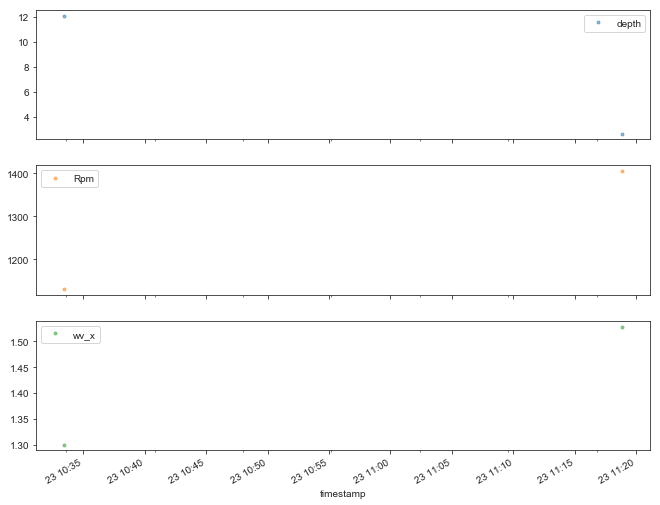

In [22]:
RAWSPEEDBMP = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/RawSpeeds03"
# D20200423T103327.892945  -- 1.258843m/s     -- 1337   rpm      -- April mission (1)
# D20200423T111851.909500  -- 1.516541m/s     -- 1337   rpm      -- April mission (2)
# D20200423T131825.448647  -- 1.945775m/s     -- 1330.5 rpm    -- April mission (3)
speed_int = [0,10000]
scenes = ['D20200423T103327.892945', 'D20200423T111851.909500', 'D20200423T131825.448647']
new_stat = stat_comb.loc[sum([stat_comb['export name'].str.contains(f) for f in scenes]) > 0]
print("####### stat_comb ######")
print(stat_comb.loc[sum([stat_comb['export name'].str.contains(f) for f in scenes]) > 0])
print("####### new_stat ######")
print(new_stat.head)
if len(new_stat) > 0:
    #new_stat = new_stat.reset_index()
    #stat.set_index('timestamp', inplace=True)
    #new_stat = new_stat.tz_localize('UTC')
    #new_stat.index = new_stat.index.tz_convert(tz='UTC')
    #new_stat = new_stat.reset_index()
    print(new_stat.columns)
    silc_to_bmp(new_stat['file name'].tolist(), RAWDIR, RAWSPEEDBMP + str(speed_int[0]) + '_' + str(speed_int[1]))
    new_stat[['file name', 'depth', 'Rpm', 'wv_x']].to_csv(RAWSPEEDBMP + str(speed_int[0]) + '_' + str(speed_int[1]) 
                    + '/'
                    + 'RAWSPEEDBMP' + str(speed_int[0]) + '_' + str(speed_int[1]) + '.csv'
                    , index = True, header=True)
    print("####### new_stat again ######")
    print(new_stat[['file name', 'depth', 'Rpm', 'wv_x']])
    cols_plot = ['depth', 'Rpm', 'wv_x']
    new_stat[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

else: 
    print('couldn\'t find images for Rpm between {0} and {1}'.format(str(speed_int[0]), str(speed_int[1])))
    

In [ ]:
RAWSPEEDBMP = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/RawSpeeds"
speed_int = [0, 3000]
new_stat = get_raw_speed(stat_comb, scenes, speed_int, RAWDIR, RAWSPEEDBMP)

if len(new_stat) > 0:
    silc_to_bmp(new_stat['file name'].tolist(), RAWDIR, RAWSPEEDBMP + str(speed_int[0]) + '_' + str(speed_int[1]))
    new_stat.to_csv(RAWSPEEDBMP + str(speed_int[0]) + '_' + str(speed_int[1]) 
                    + '/'
                    + 'RAWSPEEDBMP' + str(speed_int[0]) + '_' + str(speed_int[1]) + '.csv'
                    , index = False, header=True)
else: 
    print('couldn\'t find images for Rpm between {0} and {1}'.format(str(speed_int[0]), str(speed_int[1])))